### Importance Sampling - Koopman (1996)

In [8]:
library(MASS)

In [12]:
sv_simul <- function(theta, log_sigma0, T){
    r_t <- c()
    h_t <- c()
    sigma_bar <- theta[1]
    phi <- theta[2]
    sigma_eta <- theta[3]
    rho <- theta[4]
    
    mean <- matrix(c(0,0), nrow=2, ncol=1)
    std <- matrix(c(1, rho*sigma_eta, rho*sigma_eta, sigma_eta), nrow=2, ncol=2)
    resid <- mvrnorm(T, mean, std)
    xi_t <- resid[,1]
    eta_t <- resid[,2]
    
    h_t[1] <- phi * h0 + eta_t[1]
    r_t[1] <- sigma_bar * exp(0.5*h_t[1]) * xi_t[1]
    
    for (t in 2:T){
        h_t[t] <- phi * h_t[t-1] + eta_t[t]
        r_t[t] <- sigma_bar * exp(0.5*h_t[t]) * xi_t[t]
    }
    
    list(r_t, h_t)
}

In [16]:
# Inputs
T <- 3000
sigma_bar <- 1
phi <- 0.9
sigma_eta <- 0.675
rho <- 0
theta <- c(sigma_bar, phi, sigma_eta, rho) 
h0 <- 0.1

In [17]:
data <- sv_simul(theta, h0, T)
r_t <- unlist(data[1])
h_t <- unlist(data[2])

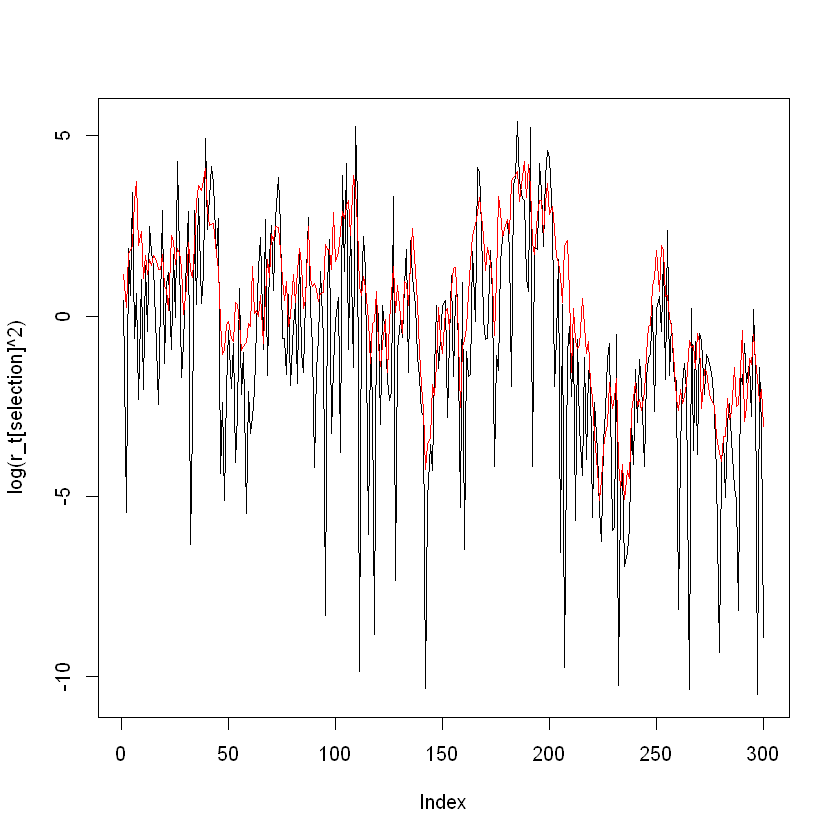

In [25]:
selection <- 1:300
plot(log(r_t[selection]**2), type='l')
lines(h_t[selection], type='l', col='red')

#### Monte Carlo Maimum Likelihood Estimation